# Capstone Project - Car Accident Severity
### Applied Data Science Capstone by IBM/Coursera

### Importing all required libraries

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisation
import random
import seaborn as sns
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, GridSearchCV
!pip install pycaret
from pycaret.classification import *
from sklearn import preprocessing
import folium
from folium.plugins import MarkerCluster
import webbrowser
from folium import plugins

%matplotlib inline

In [ ]:
#Mounting Google Drive to importing dataset in Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd "/content/gdrive/My Drive/Colab Notebooks/"

/content/gdrive/My Drive/Colab Notebooks


### Importing Dataset

In [ ]:
#Import dataset using pandas read_csv
collision_df = pd.read_csv("Data-Collisions.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Exploratory Analysis


In [ ]:
#Exploring first few rows of the dataset
collision_df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [ ]:
#Exploring the type of data present
collision_df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [ ]:
#Checking the size of the dataset
collision_df.shape

(194673, 38)

In [ ]:
#Searching for duplicate rows
duplicate_rows_df = collision_df[collision_df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 38)


In [ ]:
#Counting null values in the dataset for each column
print(collision_df.isnull().sum())

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64


### Feature Selection


In [ ]:
#Feature Selection
clean_df = collision_df[['COLLISIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','SEVERITYCODE']]
clean_df.dtypes

COLLISIONTYPE     object
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
SEVERITYCODE       int64
dtype: object

### Data Cleaning

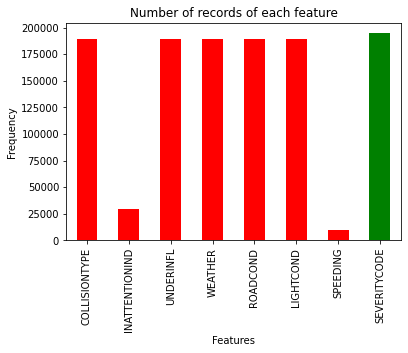

In [ ]:
#Plotting frequency of each column
freq = clean_df.count()
colors=[]
for i in range(0,len(freq)):
    if freq[i]==194673:
        colors.append('green')
    else:
        colors.append('red')

#Columns with missing values are colored red
freq.plot(kind='bar', color=colors)
plt.title('Number of records of each feature')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#Counting null values of COLLISIONTYPE column
print(clean_df['COLLISIONTYPE'].value_counts().to_frame)
print(clean_df['COLLISIONTYPE'].isnull().sum())

<bound method Series.to_frame of Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64>
4904


In [ ]:
#Replacing NAN and other type to unknown 
clean_df['COLLISIONTYPE'].replace('Other','Unknown',inplace=True)
clean_df['COLLISIONTYPE'].replace(np.nan,'Unknown',inplace=True)
print(clean_df['COLLISIONTYPE'].value_counts().to_frame)

<bound method Series.to_frame of Parked Car    47987
Angles        34674
Rear Ended    34090
Unknown       28607
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64>


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#Assigning label to each categorical value
#Parked Car:0 Angles:1 Rear Ended:2 Sideswipe:3 Left Turn:4 Pedestrian:5 Cycles:6 Right Turn:7 Head On:8
clean_df['COLLISIONTYPE'].replace('Parked Car',0,inplace=True)
clean_df['COLLISIONTYPE'].replace('Angles',1,inplace=True)
clean_df['COLLISIONTYPE'].replace('Rear Ended',2,inplace=True)
clean_df['COLLISIONTYPE'].replace('Sideswipe',3,inplace=True)
clean_df['COLLISIONTYPE'].replace('Left Turn',4,inplace=True)
clean_df['COLLISIONTYPE'].replace('Pedestrian',5,inplace=True)
clean_df['COLLISIONTYPE'].replace('Cycles',6,inplace=True)
clean_df['COLLISIONTYPE'].replace('Right Turn',7,inplace=True)
clean_df['COLLISIONTYPE'].replace('Head On',8,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#Assigning random labels to unknown value 
Unknown_feature = clean_df['COLLISIONTYPE'] == 'Unknown'
unknown_val = clean_df['COLLISIONTYPE']
unknown_val = unknown_val.values
unknown_val = unknown_val[Unknown_feature]

size = unknown_val.size

for i in range(0,size):
    unknown_val[i] = random.randint(0,8)
unknown_val
clean_df.loc[clean_df.COLLISIONTYPE == "Unknown", 'COLLISIONTYPE'] = unknown_val

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
#Verifying after cleaning
print(clean_df['COLLISIONTYPE'].value_counts().to_frame)
print(clean_df['COLLISIONTYPE'].isnull().sum())

<bound method Series.to_frame of 0    51171
1    37828
2    37267
3    21717
4    17027
5     9776
6     8575
7     6132
8     5180
Name: COLLISIONTYPE, dtype: int64>
0


In [ ]:
#Counting null values of INATTENTIONIND column
print(clean_df['INATTENTIONIND'].value_counts().to_frame)
print(clean_df['INATTENTIONIND'].isnull().sum())

<bound method Series.to_frame of Y    29805
Name: INATTENTIONIND, dtype: int64>
164868


In [ ]:
#Replacing NAN with 0 and Y with 1
clean_df['INATTENTIONIND'].replace(np.nan,'0',inplace=True)
clean_df['INATTENTIONIND'].replace('Y',1,inplace=True)
print(clean_df['INATTENTIONIND'].value_counts().to_frame)
print(clean_df['INATTENTIONIND'].isnull().sum())

<bound method Series.to_frame of 0    164868
1     29805
Name: INATTENTIONIND, dtype: int64>
0


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#Counting null values of UNDERINFL column
print(clean_df['UNDERINFL'].value_counts().to_frame)
print(clean_df['UNDERINFL'].isnull().sum())

<bound method Series.to_frame of N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64>
4884


In [ ]:
#Replacing NAN and N with 0 and Y with 1 
clean_df['UNDERINFL'].replace(np.nan,0,inplace=True)
clean_df['UNDERINFL'].replace('N',0,inplace=True)
clean_df['UNDERINFL'].replace('Y',1,inplace=True)
clean_df['UNDERINFL'].replace('0',0,inplace=True)
clean_df['UNDERINFL'].replace('1',1,inplace=True)

#Verifying after cleaning
print(clean_df['UNDERINFL'].value_counts().to_frame)
print(clean_df['UNDERINFL'].isnull().sum())

<bound method Series.to_frame of 0    185552
1      9121
Name: UNDERINFL, dtype: int64>
0


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#Counting null values of WEATHER column
print(clean_df['WEATHER'].value_counts().to_frame)
print(clean_df['WEATHER'].isnull().sum())

<bound method Series.to_frame of Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64>
5081


In [ ]:
#Replacing NAN and Other with Unknown value
clean_df['WEATHER'].replace(np.nan,'Unknown',inplace=True)
clean_df['WEATHER'].replace('Other','Unknown',inplace=True)
print(clean_df['WEATHER'].value_counts().to_frame)

<bound method Series.to_frame of Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      21004
Snowing                        907
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64>


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#Assigning labels to each categorical value
#Clear: 0 Rain and Snow: 1 Overcast and Cloudy: 2 Windy: 3
clean_df['WEATHER'].replace('Clear',0,inplace=True)
clean_df['WEATHER'].replace('Raining',1,inplace=True)
clean_df['WEATHER'].replace('Overcast',2,inplace=True)
clean_df['WEATHER'].replace('Snowing',1,inplace=True)
clean_df['WEATHER'].replace('Fog/Smog/Smoke',2,inplace=True)
clean_df['WEATHER'].replace('Sleet/Hail/Freezing Rain',1,inplace=True)
clean_df['WEATHER'].replace('Blowing Sand/Dirt',3,inplace=True)
clean_df['WEATHER'].replace('Severe Crosswind',3,inplace=True)
clean_df['WEATHER'].replace('Partly Cloudy',2,inplace=True)
print(clean_df['WEATHER'].value_counts().to_frame)

<bound method Series.to_frame of 0          111135
1           34165
2           28288
Unknown     21004
3              81
Name: WEATHER, dtype: int64>


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#Assigning random labels to Unknown values
Unknown_feature = clean_df['WEATHER'] == 'Unknown'
unknown_val = clean_df['WEATHER']
unknown_val = unknown_val.values
unknown_val = unknown_val[Unknown_feature]

size = unknown_val.size

for i in range(0,size):
    unknown_val[i] = random.randint(0,3)
unknown_val
clean_df.loc[clean_df.WEATHER == "Unknown", 'WEATHER'] = unknown_val
print(clean_df['WEATHER'].value_counts().to_frame)

<bound method Series.to_frame of 0    116338
1     39435
2     33530
3      5370
Name: WEATHER, dtype: int64>


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
#Counting null values of ROADCOND column
print(clean_df['ROADCOND'].value_counts().to_frame)
print(clean_df['ROADCOND'].isnull().sum())

<bound method Series.to_frame of Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64>
5012


In [ ]:
#Replacing NAN and Other to Unknown values
clean_df['ROADCOND'].replace(np.nan,'Unknown',inplace=True)
clean_df['ROADCOND'].replace('Other','Unknown',inplace=True)
print(clean_df['ROADCOND'].value_counts().to_frame)

<bound method Series.to_frame of Dry               124510
Wet                47474
Unknown            20222
Ice                 1209
Snow/Slush          1004
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64>


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#Assigning labels to each categorical value
#Dry: 0 Wet: 1 Slush: 2
clean_df['ROADCOND'].replace('Dry',0,inplace=True)
clean_df['ROADCOND'].replace('Wet',1,inplace=True)
clean_df['ROADCOND'].replace('Ice',1,inplace=True)
clean_df['ROADCOND'].replace('Snow/Slush',2,inplace=True)
clean_df['ROADCOND'].replace('Standing Water',1,inplace=True)
clean_df['ROADCOND'].replace('Sand/Mud/Dirt',2,inplace=True)
clean_df['ROADCOND'].replace('Oil',1,inplace=True)
print(clean_df['ROADCOND'].value_counts().to_frame)

<bound method Series.to_frame of 0          124510
1           48862
Unknown     20222
2            1079
Name: ROADCOND, dtype: int64>


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#Assigning random labels to Unknown values
Unknown_feature = clean_df['ROADCOND'] == 'Unknown'
unknown_val = clean_df['ROADCOND']
unknown_val = unknown_val.values
unknown_val = unknown_val[Unknown_feature]

size = unknown_val.size

for i in range(0,size):
    unknown_val[i] = random.randint(0,2)
unknown_val
clean_df.loc[clean_df.ROADCOND == "Unknown", 'ROADCOND'] = unknown_val
print(clean_df['ROADCOND'].value_counts().to_frame)
print(clean_df['ROADCOND'].isnull().sum())

<bound method Series.to_frame of 0    131215
1     55662
2      7796
Name: ROADCOND, dtype: int64>
0


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
#Counting null values of LIGHTCOND column
print(clean_df['LIGHTCOND'].value_counts().to_frame)
print(clean_df['LIGHTCOND'].isnull().sum())

<bound method Series.to_frame of Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64>
5170


In [ ]:
#Replacing NAN and Other with Unknown value
clean_df['LIGHTCOND'].replace(np.nan,'Unknown',inplace=True)
clean_df['LIGHTCOND'].replace('Other','Unknown',inplace=True)
print(clean_df['LIGHTCOND'].value_counts().to_frame)

<bound method Series.to_frame of Daylight                    116137
Dark - Street Lights On      48507
Unknown                      18878
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64>


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#Assigning labels to each categorical value
#Light:0 Medium:1 Dark:2
clean_df['LIGHTCOND'].replace('Daylight',0,inplace=True)
clean_df['LIGHTCOND'].replace('Dark - Street Lights On',1,inplace=True)
clean_df['LIGHTCOND'].replace('Dusk',1,inplace=True)
clean_df['LIGHTCOND'].replace('Dawn',1,inplace=True)
clean_df['LIGHTCOND'].replace('Dark - No Street Lights',2,inplace=True)
clean_df['LIGHTCOND'].replace('Dark - Street Lights Off',2,inplace=True)
clean_df['LIGHTCOND'].replace('Dark - Unknown Lighting',1,inplace=True)
print(clean_df['LIGHTCOND'].value_counts().to_frame)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


<bound method Series.to_frame of 0          116137
1           56922
Unknown     18878
2            2736
Name: LIGHTCOND, dtype: int64>


In [ ]:
#Assigning random labels to Unknown values
Unknown_feature = clean_df['LIGHTCOND'] == 'Unknown'
unknown_val = clean_df['LIGHTCOND']
unknown_val = unknown_val.values
unknown_val = unknown_val[Unknown_feature]

size = unknown_val.size

for i in range(0,size):
    unknown_val[i] = random.randint(0,2)
unknown_val
clean_df.loc[clean_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = unknown_val
print(clean_df['LIGHTCOND'].value_counts().to_frame)
print(clean_df['LIGHTCOND'].isnull().sum())

<bound method Series.to_frame of 0    122506
1     63121
2      9046
Name: LIGHTCOND, dtype: int64>
0


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
#Counting null values of SPEEDING column
print(clean_df['SPEEDING'].value_counts().to_frame)
print(clean_df['SPEEDING'].isnull().sum())

<bound method Series.to_frame of Y    9333
Name: SPEEDING, dtype: int64>
185340


In [ ]:
#Replacing NAN with 0 and Y with 1
clean_df['SPEEDING'].replace(np.nan,0,inplace=True)
clean_df['SPEEDING'].replace('Y',1,inplace=True)

#Verifying after cleaning
print(clean_df['SPEEDING'].value_counts().to_frame)
print(clean_df['SPEEDING'].isnull().sum())

<bound method Series.to_frame of 0    185340
1      9333
Name: SPEEDING, dtype: int64>
0


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#Verifying after cleaning
print(clean_df.isnull().sum())

COLLISIONTYPE     0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
SEVERITYCODE      0
dtype: int64


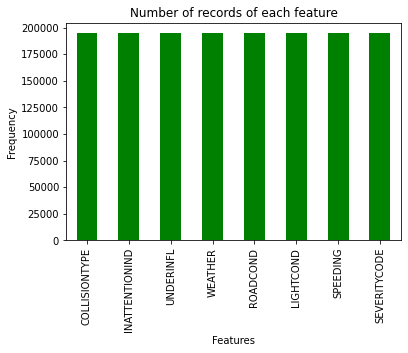

In [ ]:
#Frequency plot after cleaning
freq = clean_df.count()
colors=[]
for i in range(0,len(freq)):
    if freq[i]==194673:
        colors.append('green')
    else:
        colors.append('red')

freq.plot(kind='bar', color=colors)
plt.title('Number of records of each feature')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Checking Data type of cleaned dataframe
clean_df = clean_df.astype('int64')
clean_df.dtypes

COLLISIONTYPE     int64
INATTENTIONIND    int64
UNDERINFL         int64
WEATHER           int64
ROADCOND          int64
LIGHTCOND         int64
SPEEDING          int64
SEVERITYCODE      int64
dtype: object

### Exploratory Plots

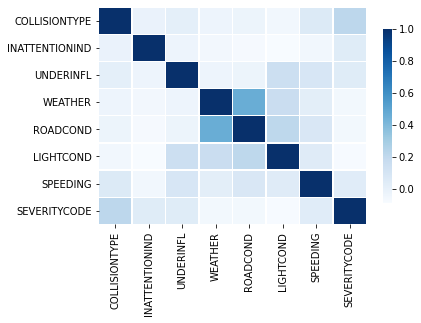

In [ ]:
#Plotting correlation between each variable for selected features
sns.heatmap(clean_df.corr(),cmap="Blues", linewidth=0.3, cbar_kws={"shrink": .8})

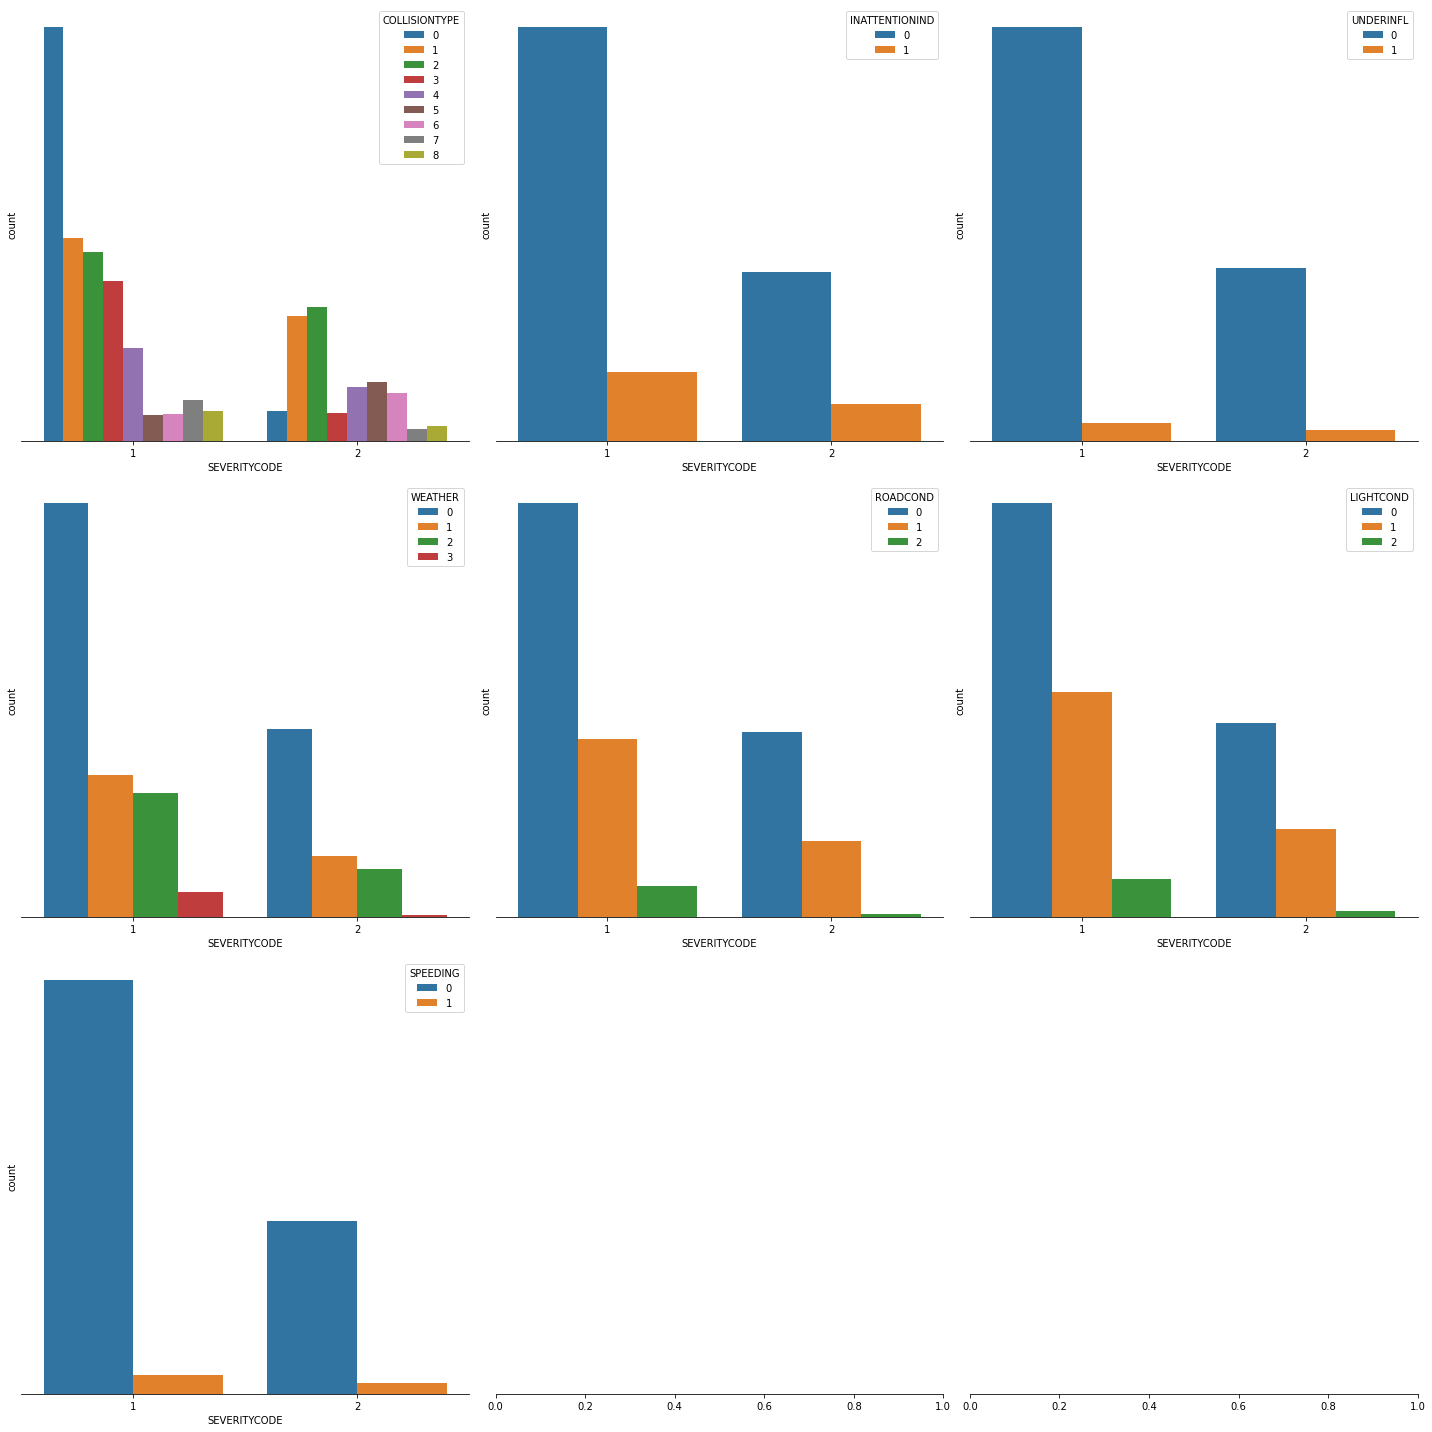

In [ ]:
#Countplot of each variable against SEVERITYCODE
f, axes = plt.subplots(3, 3, figsize=(20, 20))
sns.despine(left=True)

sns.countplot(x="SEVERITYCODE",hue='COLLISIONTYPE', data=clean_df, ax=axes[0,0])
sns.countplot(x="SEVERITYCODE",hue='INATTENTIONIND', data=clean_df,ax=axes[0,1])
sns.countplot(x="SEVERITYCODE",hue='UNDERINFL', data=clean_df,ax=axes[0,2])
sns.countplot(x="SEVERITYCODE",hue='WEATHER', data=clean_df,ax=axes[1,0])
sns.countplot(x="SEVERITYCODE",hue='ROADCOND', data=clean_df,ax=axes[1,1])
sns.countplot(x="SEVERITYCODE",hue='LIGHTCOND', data=clean_df,ax=axes[1,2])
sns.countplot(x="SEVERITYCODE",hue='SPEEDING', data=clean_df,ax=axes[2,0])

plt.setp(axes, yticks=[])
plt.tight_layout()

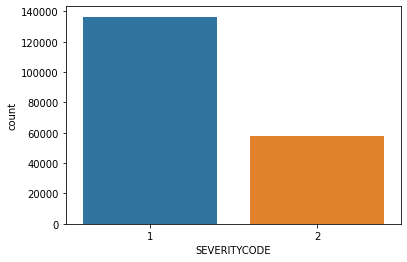

In [ ]:
#Frequency distribution of SEVERITYCODE
sns.countplot(x="SEVERITYCODE", data=clean_df)

### Splitting Dataset

In [ ]:
#Creating a target variable Y and X for all other features
X = clean_df.drop(['SEVERITYCODE'],axis=1)
y = clean_df['SEVERITYCODE'].values.reshape(-1,1)

In [ ]:
#Splitting dataset into training and testing with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3) 

#Verifying the size of both training and testing dataset
print("Train set size")
print(X_train.shape)
print(y_train.shape)
print('')
print("Test set size")
print(X_test.shape)
print(y_test.shape)

Train set size
(136271, 7)
(136271, 1)

Test set size
(58402, 7)
(58402, 1)


In [ ]:
#Balancing the imbalanced dataset using SMOTE oversampling method
balanced_data = SMOTE (random_state=0)
X_train_balanced, y_train_balanced= balanced_data.fit_sample(X_train, y_train)
# print(X_train.head())
# print(y_train.head())
# print(X_train_balanced.head())
# print(y_train_balanced.head())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


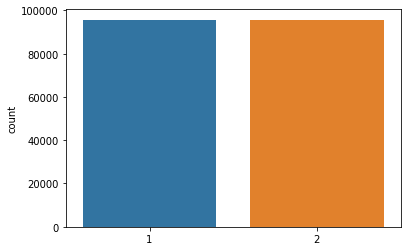

In [ ]:
#Frequency plot of balanced training dataset
sns.countplot(y_train_balanced)

### Logistic Regression

In [ ]:
#Building logistic regression model
logReg = LogisticRegression(solver = 'liblinear',C = 0.01)
logReg.fit(X_train_balanced, y_train_balanced)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logReg.score(X_train_balanced,y_train_balanced)))

Accuracy of logistic regression classifier on train set: 0.61


In [ ]:
#Making predictions for test dataset using logistic regression model
y_pred = logReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(X_test, y_test)))
logReg_score = logReg.score(X_test, y_test)

Accuracy of logistic regression classifier on test set: 0.61


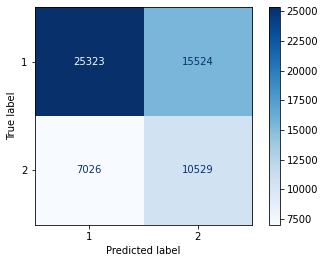

In [ ]:
#Plotting confusion matrix
plot_confusion_matrix(logReg, X_test, y_test,
                                 cmap=plt.cm.Blues)

In [ ]:
#Generating report of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.62      0.69     40847
           2       0.40      0.60      0.48     17555

    accuracy                           0.61     58402
   macro avg       0.59      0.61      0.59     58402
weighted avg       0.67      0.61      0.63     58402



In [ ]:
#Calculating AUC score of the model
logit_roc_auc = roc_auc_score(y_test, logReg.predict(X_test))
print("AUC value: {}".format(logit_roc_auc))

AUC value: 0.6098598770298401


### Logistic Regression Tuning

In [ ]:
#Setting parameters for tuning
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

In [ ]:
#Tuning the model using GridSearchCV method
logReg = LogisticRegression(solver='liblinear')
parameters = dict(C=C,
                  penalty=penalty)
logRegTuned = GridSearchCV(logReg, parameters, cv=10)

In [ ]:
#Printing the best parameter of tuned model
best_model = logRegTuned.fit(X_train_balanced, y_train_balanced)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.0001


In [ ]:
#Making predictions using tuned model
y_pred_tuned = best_model.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(best_model.score(X_train_balanced,y_train_balanced)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(best_model.score(X_test, y_test)))
logReg_score_tuned = best_model.score(X_test, y_test)

Accuracy of logistic regression classifier on train set: 0.65
Accuracy of logistic regression classifier on test set: 0.53


### Decision Tree

In [ ]:
#Building a decision tree model
decisionTree = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
decisionTree.fit(X_train_balanced, y_train_balanced)
print('Accuracy of Decision tree classifier on train set: {:.2f}'.format(decisionTree.score(X_train_balanced,y_train_balanced)))

Accuracy of Decision tree classifier on train set: 0.67


In [ ]:
#Making prediction for test dataset using decision tree model
y_pred = decisionTree.predict(X_test)
print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(decisionTree.score(X_test, y_test)))
decisionTree_score = decisionTree.score(X_test, y_test)

Accuracy of Decision tree classifier on test set: 0.66


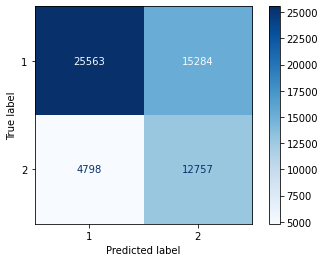

In [ ]:
#Plotting confusion matrix
plot_confusion_matrix(decisionTree, X_test, y_test,
                                 cmap=plt.cm.Blues)

In [ ]:
#Generating report of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.63      0.72     40847
           2       0.45      0.73      0.56     17555

    accuracy                           0.66     58402
   macro avg       0.65      0.68      0.64     58402
weighted avg       0.73      0.66      0.67     58402



In [ ]:
#Calculating AUC value for the model
logit_roc_auc = roc_auc_score(y_test, decisionTree.predict(X_test))
print("AUC value: {}".format(logit_roc_auc))

AUC value: 0.6762553736366979


### Decision Tree Tuning

In [ ]:
#Setting parameters for tuning
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'min_samples_leaf': [2,3,4,5,6]}
decisionTree = DecisionTreeClassifier(random_state = 100,min_samples_leaf=5) 
decisionTree_tuned = GridSearchCV(decisionTree, param_grid, cv=10)

In [ ]:
#Printing the best parameter of tuned model
best_model = decisionTree_tuned.fit(X_train_balanced, y_train_balanced)
print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

Best criterion: entropy
Best max_depth: 14


In [ ]:
#Making predictions for test dataset using tuned model
y_pred_tuned = best_model.predict(X_test)
print('Accuracy of Decision tree classifier on train set: {:.2f}'.format(best_model.score(X_train_balanced,y_train_balanced)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(best_model.score(X_test, y_test)))
decisionTree_score_tuned = best_model.score(X_test, y_test)

Accuracy of Decision tree classifier on train set: 0.70
Accuracy of Decision Tree classifier on test set: 0.64



### k Nearest Neighbour

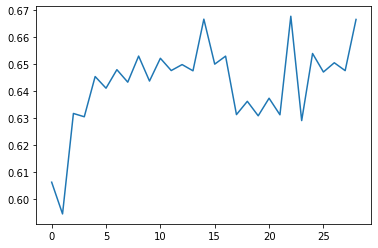

In [ ]:
#Building a k Nearest Neighbour model with k ranging from 1 to 30
acc = []
for i in range(1,30):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train_balanced, y_train_balanced)
    acc.append(kNN.score(X_train_balanced,y_train_balanced))
plt.plot(acc)

In [ ]:
# acc.index(max(acc))

In [ ]:
#Making predictions using best k value
kNN = KNeighborsClassifier(n_neighbors=acc.index(max(acc)))
kNN.fit(X_train_balanced, y_train_balanced)
print('Accuracy of K Nearest Neighbor classifier on train set: {:.2f}'.format(kNN.score(X_train_balanced,y_train_balanced)))

Accuracy of K Nearest Neighbor classifier on train set: 0.63


In [ ]:
#Making predictions for testing dataset
y_pred = kNN.predict(X_test)
print('Accuracy of K Nearest Neighbor classifier on test set: {:.2f}'.format(kNN.score(X_test, y_test)))
kNN_score = kNN.score(X_test, y_test)

Accuracy of K Nearest Neighbor classifier on test set: 0.68


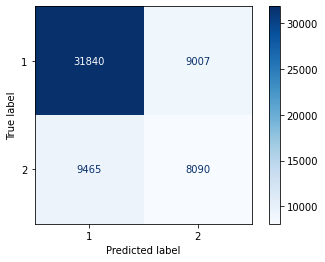

In [ ]:
#Plotting confusion matrix
plot_confusion_matrix(kNN, X_test, y_test,
                                 cmap=plt.cm.Blues)

In [ ]:
#Generating report of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.78      0.78     40847
           2       0.47      0.46      0.47     17555

    accuracy                           0.68     58402
   macro avg       0.62      0.62      0.62     58402
weighted avg       0.68      0.68      0.68     58402



In [ ]:
#Calculating AUC value of the model
logit_roc_auc = roc_auc_score(y_test, kNN.predict(X_test))
print("AUC value: {}".format(logit_roc_auc))  

AUC value: 0.6201657891861283


### k Nearest Neighbour Tuning

In [ ]:
#Tuning the model using GridSearchCV cross validation method
k_range = list(range(2, 31))
param_grid = dict(n_neighbors=k_range)
kNN = KNeighborsClassifier(n_neighbors=5)
kNN_tuned = GridSearchCV(kNN, param_grid, cv=10)

In [ ]:
#Predicting for tuned model
best_model = kNN_tuned.fit(X_train_balanced, y_train_balanced)
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 13


In [ ]:
#Making predictions for testing dataset using the tuned model
y_pred_tuned = best_model.predict(X_test)
print('Accuracy of K Nearest Neighbor classifier on train set: {:.2f}'.format(best_model.score(X_train_balanced,y_train_balanced)))
print('Accuracy of K Nearest Neighbor classifier on test set: {:.2f}'.format(best_model.score(X_test, y_test)))
kNN_score_tuned = best_model.score(X_test, y_test)

Accuracy of K Nearest Neighbor classifier on train set: 0.65
Accuracy of K Nearest Neighbor classifier on test set: 0.67


### Modelling Using PyCaret

In [ ]:
#Setting up PyCaret
pycaret_setup = setup(clean_df,target='SEVERITYCODE')

Setup Succesfully Completed!


,Description,Value
0,session_id,2394
1,Target Type,Binary
2,Label Encoded,"1: 0, 2: 1"
3,Original Data,"(194673, 8)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
#Comparing accuracies of all models for the dataset
#compare_models()

In [ ]:
#Creating logistic regression model
logReg_caret = create_model('lr',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7276,0.7478,0.2207,0.6260,0.3263,0.2020,0.2452
1,0.7302,0.7491,0.2202,0.6421,0.3279,0.2068,0.2533
2,0.7346,0.7492,0.2379,0.6538,0.3489,0.2253,0.2709
3,0.7314,0.7485,0.2197,0.6500,0.3284,0.2090,0.2571
4,0.7368,0.7460,0.2328,0.6723,0.3458,0.2270,0.2771
5,0.7366,0.7505,0.2325,0.6716,0.3454,0.2265,0.2766
6,0.7374,0.7588,0.2232,0.6866,0.3369,0.2229,0.2778
7,0.7333,0.7443,0.2200,0.6622,0.3303,0.2129,0.2635
8,0.7343,0.7495,0.2298,0.6592,0.3408,0.2203,0.2684
9,0.7313,0.7516,0.2207,0.6482,0.3293,0.2092,0.2568


In [ ]:
#Creating decision tree model
decisionTree_caret = create_model('dt',fold=10)

IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:27:49
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 10 of 10
ETC,. . . . . . . . . . . . . . . . . .,0.6 Seconds Remaining


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7294,0.7480,0.2069,0.6485,0.3137,0.1977,0.2479
1,0.7316,0.7483,0.2084,0.6622,0.3170,0.2030,0.2557
2,0.7374,0.7510,0.2291,0.6800,0.3427,0.2261,0.2786
3,0.7335,0.7495,0.2109,0.6727,0.3211,0.2081,0.2626
4,0.7343,0.7421,0.2254,0.6633,0.3364,0.2179,0.2676
5,0.7361,0.7472,0.2229,0.6781,0.3356,0.2202,0.2735
6,0.7384,0.7576,0.2136,0.7062,0.3280,0.2197,0.2805
7,0.7341,0.7459,0.2151,0.6728,0.3260,0.2118,0.2655
8,0.7352,0.7510,0.2192,0.6755,0.3310,0.2162,0.2697


In [ ]:
#Creating k Nearest Neighbour model
kNN_caret = create_model('knn',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6793,0.6924,0.4818,0.4648,0.4732,0.2427,0.2428
1,0.6789,0.6818,0.4809,0.4643,0.4724,0.2418,0.2419
2,0.7051,0.6882,0.3354,0.5101,0.4047,0.2196,0.2282
3,0.6971,0.6661,0.3852,0.4914,0.4319,0.2295,0.2326
4,0.7260,0.6985,0.2467,0.6014,0.3499,0.2131,0.2471
5,0.7107,0.6689,0.3106,0.5273,0.3909,0.2175,0.2306
6,0.7187,0.6615,0.3300,0.5490,0.4122,0.2421,0.2557
7,0.7135,0.6547,0.2131,0.5539,0.3078,0.1699,0.2008
8,0.7115,0.6611,0.2109,0.5447,0.3041,0.1647,0.1943
9,0.7152,0.6806,0.2657,0.5487,0.3580,0.2025,0.2245


In [ ]:
#Finalizing models for predictions
final_logReg = finalize_model(logReg_caret)
final_DT = finalize_model(decisionTree_caret)
final_kNN = finalize_model(kNN_caret)

In [ ]:
#Predicting using the final models and printing the report of the predictions
logReg_acc = predict_model(final_logReg)
decisionTree_acc = predict_model(final_DT)
kNN_acc = predict_model(final_kNN)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7326,0.7511,0.2285,0.6497,0.3381,0.2162,0.2626


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7367,0.7614,0.2159,0.6904,0.329,0.2175,0.2746


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6887,0.7121,0.4712,0.4788,0.475,0.2537,0.2537


In [ ]:
#Calculating accuracy of each model
logReg_caret_acc = accuracy_score(logReg_acc['SEVERITYCODE'],logReg_acc['Label'])
decisionTree_caret_acc = accuracy_score(decisionTree_acc['SEVERITYCODE'],decisionTree_acc['Label'])
kNN_caret_acc = accuracy_score(kNN_acc['SEVERITYCODE'],kNN_acc['Label'])

In [ ]:
#Comparing accuracies of Sklearn package models and PyCaret package models
model_comparison = pd.DataFrame({'Sklearn Package':[logReg_score,decisionTree_score,kNN_score],
                                 'Tuned':[logReg_score_tuned,decisionTree_score_tuned,kNN_score_tuned],
                                'PyCaret Package':[logReg_caret_acc,decisionTree_caret_acc,kNN_caret_acc]})
model_comparison.set_index(pd.Index(['Logistic Regression','Decision Tree','k Nearest Neighbour']))

,Sklearn Package,Tuned,PyCaret Package
Logistic Regression,0.613883,0.528800,0.732578
Decision Tree,0.656142,0.637478,0.736704
k Nearest Neighbour,0.683709,0.671244,0.688658


Text(0, 0.5, 'Accuracy')

<Figure size 3600x3600 with 0 Axes>

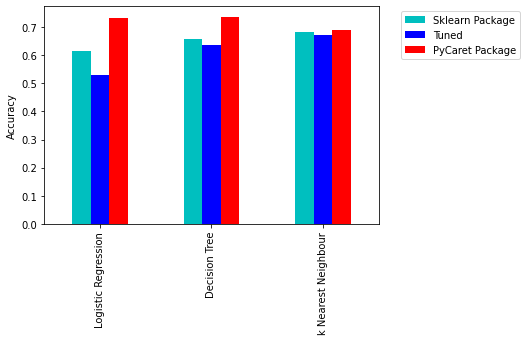

In [ ]:
#Plotting comparison of accuracies of all models
plt.figure(figsize=(50,50))
model_comparison.plot(kind='bar',color = list('cbr'))
positions = (0, 1, 2)
labels = ('Logistic Regression','Decision Tree','k Nearest Neighbour')
plt.xticks(positions, labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Accuracy')


### Visualizing Incident Location - Folium Map

In [ ]:
#Visualizing incident locations using Folium Map
map_data = collision_df
map = folium.Map(location=[47.606209, -122.332069], zoom_start=12)
map_clust = MarkerCluster().add_to(map)
location = map_data[['Y', 'X']][map_data['X'].notnull()][:5000]
loc = location.values.tolist()
for i in range(len(loc)):
  folium.Marker(loc[i]).add_to(map_clust)
map